<a href="https://colab.research.google.com/github/idrisaleo/dog_breed_identification/blob/main/dog_breed_identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# End-to-End Multi-Class Classification

This notebook builds an end-to-end multi-class image classifier using TensorFlow 2.0 and TensorFlow Hub

## 1. Problem

Identify the breed of a dog given an image of such dogs.

Trying to identify the breed of a dog just with the aid of Deep learning and transfer learning....


## 2. Data

The data was from Kaggle API [link text](https://www.kaggle.com/datasets/carlosmiao/dogbreedidentification)


## Evaluation

The evaluation is a file with prediction probabilities for each dog breed of each test image.

## Features

Some information about the data.

* We are dealing with images(i.e. unstructured data). So, it's probably wise we use deep/transfer learning. 

* There are 120 breeds of dog (i.e. there are 120 different classes). This a prime example of a multiclass classification..




In [ ]:
!sudo add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!sudo apt-get update -qq 2>&1 > /dev/null
!sudo apt -y install -qq google-drive-ocamlfuse 2>&1 > /dev/null
!google-drive-ocamlfuse



debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: www-browser: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: links2: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: elinks: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: links: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: lynx: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: w3m: not found
xdg-open: no method available for opening 'https://accounts.google.com/o/oauth2/auth?client_id=564921029129.apps.googleusercontent.com&redirect_uri=https%3A%2F%2Fgd-ocaml-auth.appspot.

In [ ]:
!sudo apt-get install -qq w3m # to act as web browser 
!xdg-settings set default-web-browser w3m.desktop # to set default browser
%cd /content
!mkdir drive
%cd drive
!mkdir MyDrive
%cd ..
%cd ..
!google-drive-ocamlfuse /content/drive/MyDrive

/content
mkdir: cannot create directory ‘drive’: File exists
/content/drive
mkdir: cannot create directory ‘MyDrive’: File exists
/content
/
Access token retrieved correctly.


In [ ]:
## !unzip "content/drive/MyDrive/CatDog/catdog.zip" -d "content/drive/MyDrive/CatDog"

In [ ]:
# importing the core tools.....

import tensorflow as tf
import tensorflow_hub as hub
print('TF Version:', tf.__version__) 
print('Hub Version:', hub.__version__)

TF Version: 2.8.2
Hub Version: 0.12.0


In [ ]:
# Check for GPU availability
print("GPU Available", "Hoooray!!!" if tf.config.list_physical_devices("GPU") else "not available")

GPU Available Hoooray!!!


In [ ]:
# Check out the labels of our data
import pandas as pd
labels_csv = pd.read_csv("content/drive/MyDrive/dogbreed/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


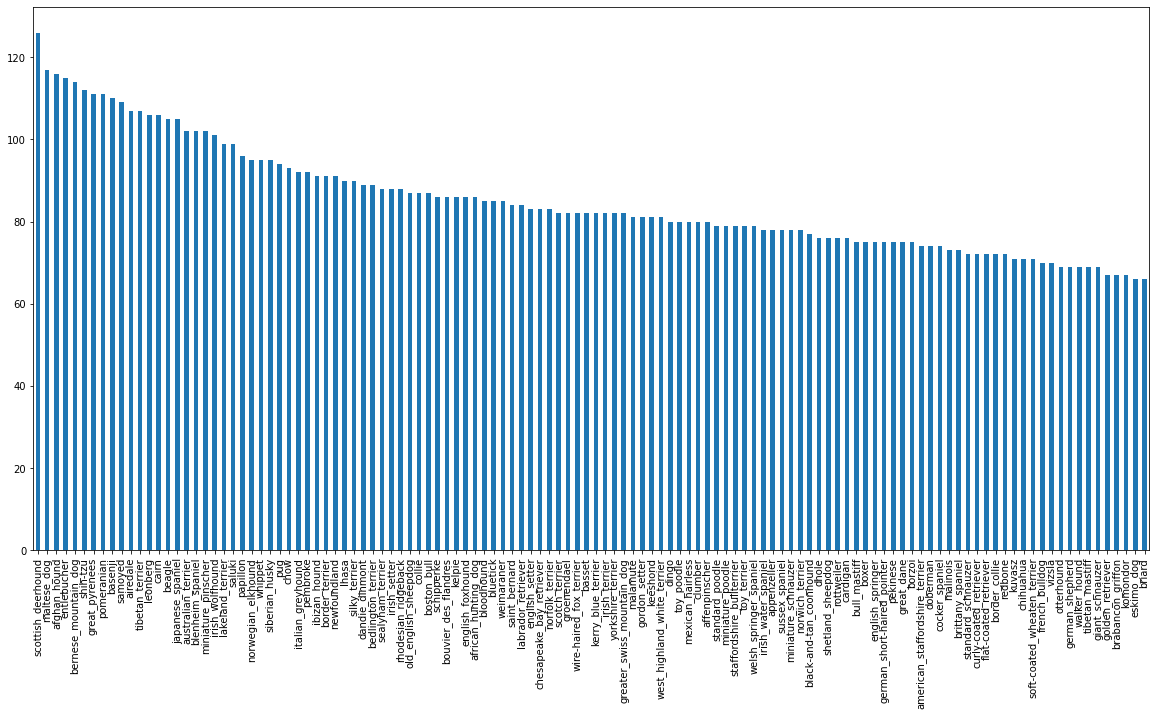

In [ ]:
## The number of images belonging to the same breed........
labels_csv["breed"].value_counts().plot.bar(figsize=(20, 10))

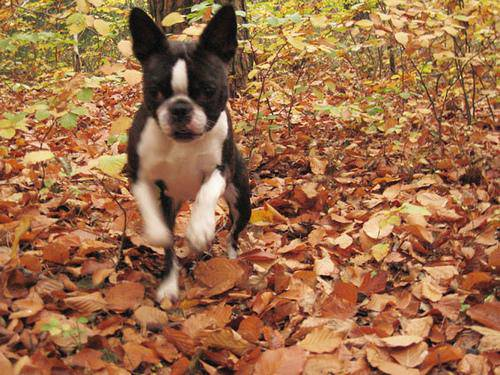

In [ ]:
from IPython.display import Image
Image("/content/drive/MyDrive/dogbreed/train/000bec180eb18c7604dcecc8fe0dba07.jpg") 

In [ ]:
# Create pathnames from Image IDs
filepaths = ["content/drive/MyDrive/dogbreed/train/" + fname +'.jpg' for fname in labels_csv["id"]]

In [ ]:
import os
os.listdir("content/drive/MyDrive/dogbreed/train")

if len(os.listdir("content/drive/MyDrive/dogbreed/train")) == len(filepaths):
  print("Proceed, alles gut!")
else:
  print("Something is not adding up")


Proceed, alles gut!


In [ ]:
len(os.listdir("content/drive/MyDrive/dogbreed/train")), len(filepaths)

(10222, 10222)

In [ ]:
labels_csv

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
...,...,...
10217,ffd25009d635cfd16e793503ac5edef0,borzoi
10218,ffd3f636f7f379c51ba3648a9ff8254f,dandie_dinmont
10219,ffe2ca6c940cddfee68fa3cc6c63213f,airedale
10220,ffe5f6d8e2bff356e9482a80a6e29aac,miniature_pinscher


In [ ]:
import numpy as np

breeds = labels_csv["breed"].to_numpy()
breeds

## sample of other way to do this......
ds = labels_csv["breed"]
ds = np.array(breeds)

In [ ]:
# seee if number of breed_labels matches the number of filenames
if len(breeds) == len(filepaths):
  print("It is all good, continue....")
else:
  print("Something isn't right")

It is all good, continue....


In [ ]:
## Find the unique labels 
unique_breeds = np.unique(breeds)
## of the 10222 breed types, we have 120 ones.......
unique_breeds.size, breeds.size

(120, 10222)

In [ ]:
# Turn a single label into an array of boolean, this is to know when a breed matches with the unique breed
breeds[10] == unique_breeds

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
breeds[10]

'shetland_sheepdog'

In [ ]:
## turn all the breed types into a series of boolean by looping through
## the breed types, returning when each matches with the unique breed.....
boolean_labels = [breed == unique_breeds for breed in breeds]
boolean_labels[0:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
print(breeds[12]) ## original label position
print(np.where(unique_breeds == breeds[12])) ## where the breed conforms with the unique breed
print(boolean_labels[12].argmax()) ## index where label occurs in boolean...
print(boolean_labels[12].astype(int)) ## where boolean label is true, returns 1


maltese_dog
(array([73]),)
73
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


## Creating our Validation set


In [ ]:
## lets create our X and y variable before that....

X = filepaths
y = boolean_labels

In [ ]:
len(X), len(y)

(10222, 10222)

###### We are going to start with a reduced while experimenting, while will we increase as we need more...


In [ ]:
# set number of images to use for experimenting, do that with a slider...

NUM_IMAGES = 1000 #@param {type:"slider", min:1000, max:10000, step:1000} 

In [ ]:
## splitting our data into train and val
from sklearn.model_selection import train_test_split

## splitting into train and validation unto the total size of our slider, i.e NUM_IMAGES
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state=0)
                                                  
                      

In [ ]:
## Rough code

def pre(paths):
  img = tf.io.read_file(paths)
  img = tf.image.decode_jpeg(img, channel=3)
  img = tf.image.convert_image_dtype(img, tf.float32)
  img= tf.image.resize(img, size=[224, 224])
  return img


def tup(paths, label):
  img = pre(paths)
  return img, label


def tr_va_te_batch(X, y=False, batch_size=[32], te_data=False, va_data=False):
  if te_data:
    '''make a data dataset out of the filepath, converting the file into tensor
       map this filepath to necessary preprocessing and batch it
       return the step above
    '''
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X)))
    data_batch = data.map(pre).batch(batch_size)
    return data_batch


  elif va_data:
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X)), (tf.constant(y)))
    data_batch = data.map(tup).batch(batch_size)
    return data_batch

  else: 
    data = tf.data.Dataset((tf.constant(X)), (tf.constant(y)))
    ## shuffle your data to prevent any form of bias
    data = data.shuffle(buffer_size=len(X)) ## shuffle up to the maximum length
    data_batch = data.map(tup).batch(batch_size)


treni = tr_va_te_batch(X_train, y_train)
val = tr_va_te_batch(X_val, y_val)

def pic(im, la):
  plt.figure(figsize=(15,10))
  for i in range(im):
    ax = plt.subplot(5, 5, i+1)
    plt.imshow(im[i])
    plt.title(unique_breeds[la[i].argmax()])
    plt.axis("off")

tr_im, tr_la = next(treni.as_numpy_iterator())



pic(tr_im, tr_la)


## Preprocessing images (turning images into Tensors)

### to do this, I will write a function that does some few things:

1. Take image filepath(i.e. filenames) as input
2. Use TensorFlow to read the file and save it to a variable 'image'
3. Turn (decode) our image(jpg) into Tensors with three colour channel
4. Normalise our image(convert color channel values from 0-255 to 0-1)
4. Resize the image to be in size 224, 224
5. Return the processed image


In [ ]:
## All these steps just to process the image, the label requires little manipulation on it....+
## create image size

IMG_SIZE = 224

## write the function
def processed_image(image_path):
  '''
  A function that takes image path as input
  '''
  ## use tf to read the file and save it into image
  image = tf.io.read_file(image_path)
  ## turn the jpeg into numerical tensor with 3 colour channels of Red, Green and Blue, save as img
  image = tf.image.decode_jpeg(image, channels=3)
  ## convert the colour channel values from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  ## resize to our desired value (224, 224)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])
  return image


Take image filepath(i.e. filenames) as input
Use TensorFlow to read the file and save it to a variable 'image'
Turn our image(jpg) into Tensors
Resize the image to be in size 224, 224
Return the processed image

def fun(filepath):
  image = tf.io.read_file(filepath)
  image = tf.decode_jpeg(image, channels=3)
  image = tf.image.convert_image_dtype(image, tf.float32)
  image = tf.image.resize(image, size=[224, 224])
  return image

def anofun(filepath, labelpath):
  image = fun(filepath)
  return image, labelpath


anofun(X[2], y[2])






In [ ]:
## we make in a tuple our image_path and corresponding label for smooth batching.

## get preprocessed image and label 
def tuple_imagelabel(image_path, label):
  image = processed_image(image_path)
  return image, label

In [ ]:
## In other to fit our data accordingly, it is expected we turn them into batches for easy fitting. 
## We will write a function to batch the train, validation and test data

BATCH_SIZE = 32

def train_val_test_batch(X, y=False, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  if test_data:
    print("creating test_data batches")
    ## creating a tensorflow dataset out of our filepaths/image, i.e X 
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X)))
    ## mapping that dataset to the process function(i.e. the cleaning up of the image and distributing into batches
    data_batch = data.map(processed_image).batch(BATCH_SIZE)
    return data_batch


  elif valid_data:
    print("creating valid_data batches")
    ## creating a tensorflow dataset out of our filepaths/image and label, i.e X & y. We do this bcos valid_data has labels
    ## and it is infact the tuple of X and y the mapping will be made on....
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), 
                                              tf.constant(y)))
    ## mapping the dataset to the tuple of image and label & distributing into batches
    data_batch = data.map(tuple_imagelabel).batch(BATCH_SIZE)
    return data_batch

  else:
    print("creating train_data batches")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                              tf.constant(y)))
    ## shuffling the new data for our data to unlearn any sorts of bias as a result of the order in which it came
    data = data.shuffle(buffer_size=len(X))
    data = data.map(tuple_imagelabel)
    data_batch = data.batch(BATCH_SIZE)
    return data_batch


In [ ]:
train_data = train_val_test_batch(X_train, y_train)
val_data = train_val_test_batch(X_val, y_val, valid_data=True)


creating train_data batches
creating valid_data batches


In [ ]:
train_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [ ]:
unique_breeds[y[25].argmax()]
#boolean_labels[12].argmax())
#y[25].argmax()

'golden_retriever'

In [ ]:
import matplotlib.pyplot as plt 

def vis_25(image, label):
  plt.figure(figsize=(15, 10))
  ## loop through the 25 images
  for i in range(25):
    ax = plt.subplot(5, 5, i+1) ## make them in a subplot of 5 row ands columns, basically dividing d loop into 5 places
    plt.imshow(image[i]) ## plot the ith image
    ## index of the ith label (i.e index 1) of the unique_breeds as the title
    plt.title(unique_breeds[label[i].argmax()])
    plt.axis("off")

In [ ]:
train_img, train_label = next(train_data.as_numpy_iterator())

In [ ]:
len(train_img)

32

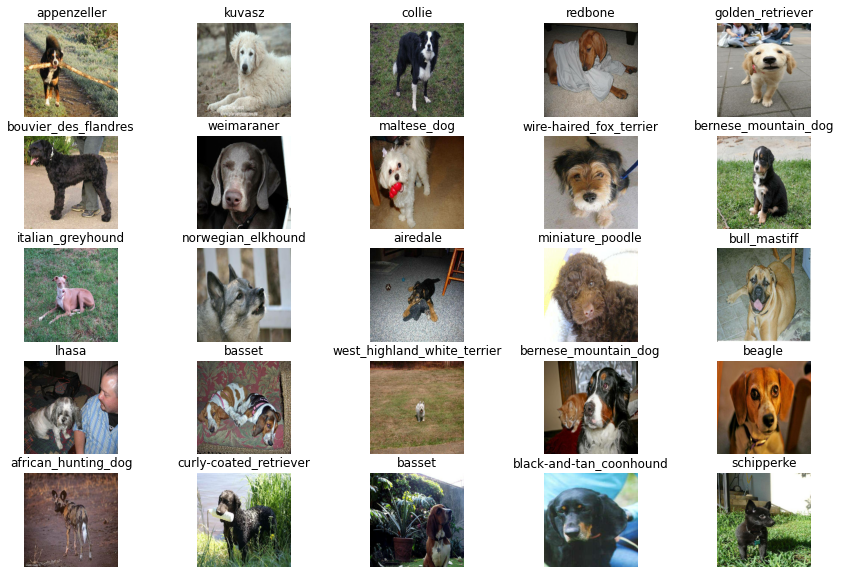

In [ ]:
vis_25(train_img, train_label)

In [ ]:
val_img, val_label = next(val_data.as_numpy_iterator())

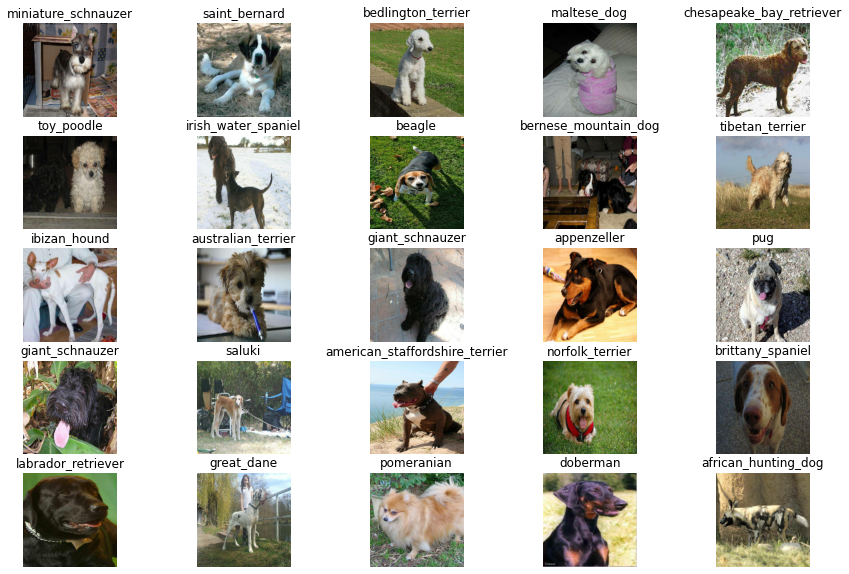

In [ ]:
vis_25(val_img, val_label)

In [ ]:
#unique_breeds[(boolean_labels[120].argmax()]
#unique_breeds([boolean_labels[10].argmax()])
unique_breeds[y[10].argmax()]

'shetland_sheepdog'

In [ ]:
unique_breeds[99]

'shetland_sheepdog'

In [ ]:
type(y), type(boolean_labels)

(list, list)

In [ ]:
unique_breeds[38]

'doberman'

In [ ]:
val_data.as_numoy_iterator()

AttributeError: ignored

In [ ]:
## To build your model, you need to put some things into place

## setup input shape to the model (i.e. what the input shape will be like)
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3]
## and the output shape
OUTPUT_SHAPE = len(unique_breeds)
## search for suitable transfer learning model 
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5"



Since you have setup the input, output, and model_url, you will need to put tham together into a keras deep learning model.

To do, lets create a function that:

1. Takes the input shape, output shape, model_url as our parameters.
2. outlines the layers in a Keras deep learning model in a sequential pattern.
3. Compiles the model(i.e how it should be evaluated and improved).
4. builds the model(i.e. that tells the model the input shape it will be getting)
5. returns the model



In [ ]:
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  ## setup the layers
  model = tf.keras.Sequential([
    hub.KerasLayer(MODEL_URL), ## layer 1 (input_layer)
    tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                          activation="softmax") # layer 2 (output layer)
  ])
  ## compile the model 
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
  )

  ## build the model
  model.build(INPUT_SHAPE)

  return model



In [ ]:
model = create_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 1001)              5432713   
                                                                 
 dense_2 (Dense)             (None, 120)               120240    
                                                                 
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________
